In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tips_df = sns.load_dataset('tips')

In [3]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips_df.shape

(244, 7)

In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# EDA

In [6]:
numericals = tips_df.select_dtypes(include=np.number)
categoricals = tips_df.select_dtypes(include='category')


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

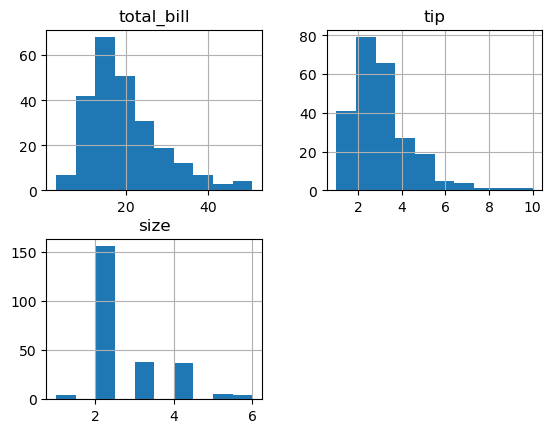

In [7]:
#plotting histograms
numericals.hist()

In [8]:
'''Just to Test'''

'Just to Test'

In [9]:
#from sklearn.preprocessing import PowerTransformer

In [10]:
#pt = PowerTransformer()
#pt.fit_transform(numericals[['tip']])
#numericals['tip']= pt.fit_transform(numericals[['tip']])

In [11]:
#numericals.hist()

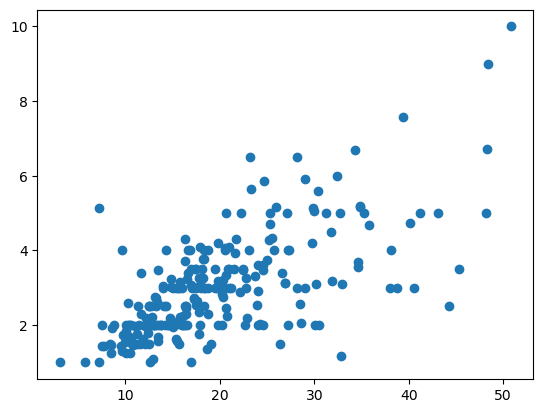

In [12]:
plt.scatter(x=numericals['total_bill'],y=numericals['tip'])

# Preprocessing - Categorical variables encoding

In [13]:
cat_encoded = pd.get_dummies(categoricals)

In [14]:
cat_encoded

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,1,0,0,1,0,0,1,0,0,1
240,0,1,1,0,0,0,1,0,0,1
241,1,0,1,0,0,0,1,0,0,1
242,1,0,0,1,0,0,1,0,0,1


In [15]:
final_df = pd.concat([numericals, cat_encoded],axis=1)

# Xy Split

In [16]:
X = final_df.drop(columns = 'tip')
y = final_df['tip']

In [17]:
X.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


# Train-test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

# Scaling / Standadizing / PowerTransforming

In [51]:
np.array(y_train).reshape(-1,1)

array([[ 3.5 ],
       [ 5.65],
       [ 2.5 ],
       [ 2.01],
       [ 4.08],
       [ 2.09],
       [ 1.  ],
       [ 3.41],
       [ 3.48],
       [ 2.  ],
       [ 3.  ],
       [ 2.71],
       [ 3.  ],
       [ 3.  ],
       [ 3.  ],
       [ 3.68],
       [ 4.71],
       [ 3.  ],
       [ 4.2 ],
       [ 1.73],
       [ 4.  ],
       [ 3.15],
       [ 1.5 ],
       [ 3.  ],
       [ 2.  ],
       [ 2.5 ],
       [ 1.57],
       [ 3.6 ],
       [ 4.3 ],
       [ 3.06],
       [ 5.92],
       [ 1.48],
       [ 4.3 ],
       [ 3.  ],
       [ 2.6 ],
       [ 4.73],
       [ 3.5 ],
       [ 4.  ],
       [ 3.08],
       [ 2.54],
       [ 3.76],
       [ 3.  ],
       [ 3.  ],
       [ 2.3 ],
       [ 2.  ],
       [ 1.25],
       [ 2.5 ],
       [ 6.5 ],
       [ 2.02],
       [ 1.01],
       [ 3.5 ],
       [ 4.  ],
       [ 5.  ],
       [ 2.5 ],
       [ 2.  ],
       [ 1.63],
       [ 3.11],
       [ 3.  ],
       [ 5.17],
       [10.  ],
       [ 2.5 ],
       [ 3.  ],
       [

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##powertranform response

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(y_train).reshape(-1,1)
y_train_t = pt.transform((y_train).reshape(-1,1))
y_test_t = pt.transform((np.array)(y_test).reshape(-1,1))

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.5   5.65  2.5   2.01  4.08  2.09  1.    3.41  3.48  2.    3.    2.71
  3.    3.    3.    3.68  4.71  3.    4.2   1.73  4.    3.15  1.5   3.
  2.    2.5   1.57  3.6   4.3   3.06  5.92  1.48  4.3   3.    2.6   4.73
  3.5   4.    3.08  2.54  3.76  3.    3.    2.3   2.    1.25  2.5   6.5
  2.02  1.01  3.5   4.    5.    2.5   2.    1.63  3.11  3.    5.17 10.
  2.5   3.    2.    5.    2.    2.23  1.8   2.61  2.    5.    4.67  2.
  2.5   3.61  2.5   3.    6.7   3.18  2.    1.98  1.25  2.    2.2   3.
  1.97  3.23  2.64  5.6   3.09  2.24  2.    7.58  3.5   4.    3.4   5.
  4.    6.    3.25  5.    1.32  1.5   1.5   3.31  1.64  1.56  2.    3.48
  1.17  2.    3.    2.    3.    3.27  2.01  3.12  3.16  3.    3.5   5.
  1.5   1.92  3.    1.96  3.    6.73  2.23  2.83  3.71  2.24  3.14  3.39
  3.25  2.    1.58  3.76  4.34  4.29  2.5   2.    4.    9.    4.    2.
  1.1   2.    1.76  2.05  5.85  2.75  1.5   2.5   3.5   1.    2.    4.19
  2.18  3.07  3.75  2.88  1.66  5.2   2.    1.5   2.    3.48  1.5   5.07
  4.    2.    2.2   6.5   2.    1.68  3.    4.08  3.5   3.    4.06  3.02
  1.    3.55  2.5 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Modelling

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
#Model fitting
lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train)


In [39]:
y_pred = model.predict(X_test_scaled)

In [54]:
y_test_t = y_test_t.reshape(61,)

NameError: name 'y_test_t' is not defined

In [ ]:
y_pred = 

In [40]:
residuals_df = pd.DataFrame({'y_test':y_test_t,'y_pred':y_pred,'res':y_pred-y_test_t})

In [41]:
residuals_df

,y_test,y_pred,res
24,3.18,2.915578,-0.264422
6,2.00,1.819387,-0.180613
153,2.00,3.803762,1.803762
211,5.16,3.800344,-1.359656
198,2.00,2.246150,0.246150
...,...,...,...
172,5.15,1.540090,-3.609910
242,1.75,2.712453,0.962453
152,2.74,2.874074,0.134074
231,3.00,2.581594,-0.418406


In [42]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [43]:
model_mse = mse(y_test_t, y_pred)
model_r2 = r2(y_test_t, y_pred)
model_rmse = np.sqrt(model_mse)

In [44]:
model_r2, model_mse, model_rmse

(0.38712868666123046, 0.8153792141074344, 0.902983507107098)

# Feature importance

In [45]:
model.coef_

array([ 8.83802466e-01,  1.91867294e-01, -1.36332590e+13, -1.36332590e+13,
       -7.87262668e+13, -7.87262668e+13, -6.37166577e+12, -4.17951043e+12,
       -7.10513092e+12, -6.81872319e+12, -1.77192468e+12, -1.77192468e+12])

In [46]:
model.intercept_

3.0790589149979835

In [47]:
fi_df = pd.DataFrame({'var':X_train.columns, 'coef':model.coef_})

In [48]:
fi_df

,var,coef
0,total_bill,8.838025e-01
1,size,1.918673e-01
2,sex_Male,-1.363326e+13
3,sex_Female,-1.363326e+13
4,smoker_Yes,-7.872627e+13
5,smoker_No,-7.872627e+13
6,day_Thur,-6.371666e+12
7,day_Fri,-4.179510e+12
8,day_Sat,-7.105131e+12
9,day_Sun,-6.818723e+12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'total_bill'),
  Text(1, 0, 'size'),
  Text(2, 0, 'sex_Male'),
  Text(3, 0, 'sex_Female'),
  Text(4, 0, 'smoker_Yes'),
  Text(5, 0, 'smoker_No'),
  Text(6, 0, 'day_Thur'),
  Text(7, 0, 'day_Fri'),
  Text(8, 0, 'day_Sat'),
  Text(9, 0, 'day_Sun'),
  Text(10, 0, 'time_Lunch'),
  Text(11, 0, 'time_Dinner')])

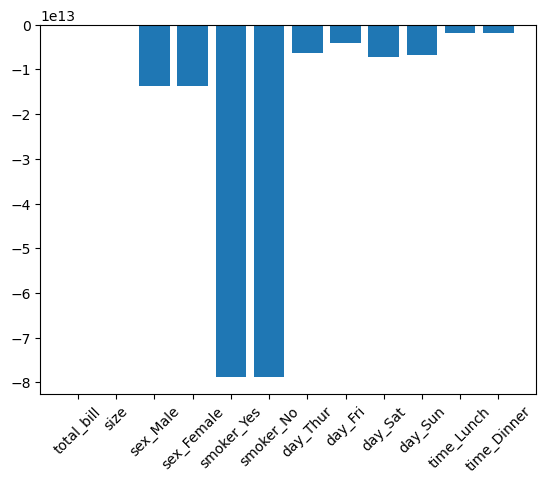

In [49]:
plt.bar(x=fi_df['var'], height= fi_df['coef'])
plt.xticks(rotation=45)

In [50]:
X['total_bill'].max()

50.81

In [ ]:
# y_pred vs y_test
plt.scatter(x=y_test_t, y=y_pred)

In [ ]:
#distribution of residuals
residual_df['res'].hist()

In [ ]:
#checking for homoscedasity (constant variance of residuals)
plt.scatter(x=residual_df['y_pred'], y=residuals_df['res'])